In [1]:
# Set working directory.

import os

os.chdir(r'Q:\home\Metasynchronous cell divisions\H1 Alexa 488 injection\Injection in AB\LSM800up\29 C_Controlled Temperature\2021-08-02\New analysis pathway')
cwd = os.getcwd()
cwd

'Q:\\home\\Metasynchronous cell divisions\\H1 Alexa 488 injection\\Injection in AB\\LSM800up\\29 C_Controlled Temperature\\2021-08-02\\New analysis pathway'

In [2]:
# Import data file.
import numpy as np
import pandas as pd
from ipywidgets import *
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

In [3]:
# Choose the Imaris output file.

def select_files(b):
    clear_output()                                         # Button is deleted after it is clicked.
    root = Tk()
    root.withdraw()                                        # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True)   # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=False)    # List of selected files will be set button's file attribute.
    print(b.files)                                         # Print the list of files selected.
    
fileselect = Button(description="Select File")
fileselect.on_click(select_files)

display(fileselect)

Q:/home/Metasynchronous cell divisions/H1 Alexa 488 injection/Injection in AB/LSM800up/29 C_Controlled Temperature/2021-08-02/New analysis pathway/23-92_64-256cells_H1Alexa488 in AB-05.xls


In [4]:
# Call the file in the above location 'file'. 
file = fileselect.files

In [5]:
# Read the 'Position' sheet in 'file'. Call it df1.
df1 = pd.read_excel (file, 'Position', header=1) # This line reads the 'position' sheet in the excel file. header=1 tells pandas
# that the first row has headers. The counting of rows starts with zero and moves forward as 0,1,2, etc.
df1

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,ID
0,56784.300781,23505.199219,162.88800,um,Spot,Position,12,12
1,56847.199219,23431.900391,157.50000,um,Spot,Position,13,0
2,56890.601562,23494.800781,152.50000,um,Spot,Position,13,1
3,56785.101562,23391.199219,147.50000,um,Spot,Position,13,2
4,56917.898438,23393.000000,147.50000,um,Spot,Position,13,3
...,...,...,...,...,...,...,...,...
99,56675.601562,23286.800781,3.49823,um,Spot,Position,54,78
100,56909.000000,23729.800781,11.64810,um,Spot,Position,54,86
101,56594.500000,23491.300781,8.08704,um,Spot,Position,55,80
102,56967.300781,23701.099609,20.83510,um,Spot,Position,55,87


In [6]:
# Delete unwanted columns.
df1 = df1.drop('Unit', 1)
df1 = df1.drop('Category', 1)
df1 = df1.drop('Collection', 1)

In [7]:
# Sort sequentially based on Time.
sorted = df1.sort_values(by = ['Time'])

# Create a new column with time in seconds.
sorted['Time_seconds'] = sorted['Time'] * 31.18

sorted

,Position X,Position Y,Position Z,Time,ID,Time_seconds
0,56784.300781,23505.199219,162.888000,12,12,374.16
14,56802.300781,23261.900391,54.471901,13,46,405.34
13,56709.300781,23467.500000,134.158997,13,45,405.34
12,56786.300781,23482.500000,87.500000,13,41,405.34
11,56863.898438,23571.300781,142.940002,13,35,405.34
...,...,...,...,...,...,...
99,56675.601562,23286.800781,3.498230,54,78,1683.72
100,56909.000000,23729.800781,11.648100,54,86,1683.72
102,56967.300781,23701.099609,20.835100,55,87,1714.90
101,56594.500000,23491.300781,8.087040,55,80,1714.90


In [8]:
outputfilename_all = input('Imaging date?')

Imaging date?02082021


In [9]:
# Create a new column with cell nos. for plotting.
sorted['Cell_number'] = np.arange(sorted.shape[0]) # Creates a new column with row (cell) nos. for plotting.

# Write the 'sorted' file
sorted.to_excel('Sorted ' + outputfilename_all + '.xlsx')
sorted

,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number
0,56784.300781,23505.199219,162.888000,12,12,374.16,0
14,56802.300781,23261.900391,54.471901,13,46,405.34,1
13,56709.300781,23467.500000,134.158997,13,45,405.34,2
12,56786.300781,23482.500000,87.500000,13,41,405.34,3
11,56863.898438,23571.300781,142.940002,13,35,405.34,4
...,...,...,...,...,...,...,...
99,56675.601562,23286.800781,3.498230,54,78,1683.72,99
100,56909.000000,23729.800781,11.648100,54,86,1683.72,100
102,56967.300781,23701.099609,20.835100,55,87,1714.90,101
101,56594.500000,23491.300781,8.087040,55,80,1714.90,102


In [10]:
min_Time = min(sorted['Time_seconds'])
min_Time

374.15999999999997

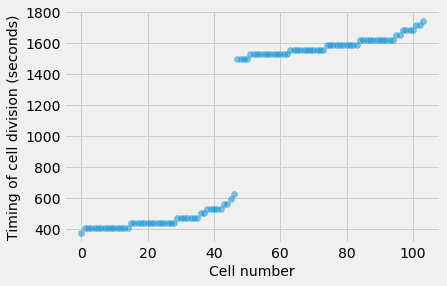

In [11]:
# Plot... a 2d plot, where the adjusted coordinate values were plotted. 
# x=0, y=0 were the coordinates of the first dividing cells. 
# In the below plot, rows of cells can be imagined with a centre around 0,0.)

from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
plt.scatter(sorted.Cell_number, sorted.Time_seconds, marker='o', alpha = 0.5)
plt.xlabel("Cell number", fontsize=14)
plt.ylabel("Timing of cell division (seconds)", fontsize=14)

plt.savefig('Cell Division Timing scatter plot ' + outputfilename_all + '.pdf', dpi=300, bbox_inches='tight')
plt.show()

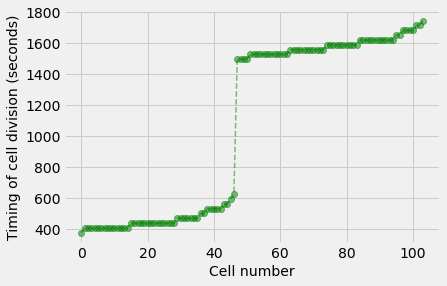

In [12]:
plt.plot(sorted.Cell_number, sorted.Time_seconds, marker='o', linestyle='--', linewidth=1.5, color = 'green', markersize=6, alpha=0.5)
plt.xlabel("Cell number", fontsize=14)
plt.ylabel("Timing of cell division (seconds)", fontsize=14)

plt.savefig('Cell Division Timing line plot ' + outputfilename_all + '.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# Split the filt_sorted dataframe into multiple dataframes (different rounds of division).
# Splitting is done based on the difference between values in subsequent rows in the 'Adjusted time' column.
# Here I have set the difference threshold at 900 seconds (15 minutes). Diff> 900 would suggest different rounds of division.

group_ids = (sorted.Time_seconds.diff() > 800).cumsum()
div1, div2, div3 = [x for _, x in sorted.groupby(group_ids)] # Four separations between five mitotic rounds. # Change
# as required.

In [15]:
celldiv_round_div1 = input('Which cell division?')
div1.to_excel('div1_' + celldiv_round_div1 + '.xlsx')
div1

Which cell division?64-128


,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number
0,56784.300781,23505.199219,162.888000,12,12,374.16,0
14,56802.300781,23261.900391,54.471901,13,46,405.34,1
13,56709.300781,23467.500000,134.158997,13,45,405.34,2
12,56786.300781,23482.500000,87.500000,13,41,405.34,3
11,56863.898438,23571.300781,142.940002,13,35,405.34,4
9,56774.199219,23415.300781,89.981300,13,16,405.34,5
8,56902.199219,23307.400391,82.500000,13,13,405.34,6
10,56847.300781,23364.199219,112.750999,13,34,405.34,7
6,56911.398438,23404.199219,85.787102,13,8,405.34,8
5,56994.199219,23389.199219,52.500000,13,7,405.34,9


In [16]:
celldiv_round_div2 = input('Which cell division?')
div2.to_excel('div2_' + celldiv_round_div2 + '.xlsx')
div2

Which cell division?128-256


,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number
47,56811.601562,23486.099609,97.441002,48,48,1496.64,47
48,56902.601562,23420.300781,82.500000,48,52,1496.64,48
49,56832.601562,23353.000000,120.739998,48,57,1496.64,49
50,56802.898438,23603.000000,100.178001,48,67,1496.64,50
58,56886.500000,23253.599609,25.137600,49,94,1527.82,51
62,56905.601562,23604.000000,77.500000,49,104,1527.82,52
61,56875.199219,23585.599609,138.240997,49,103,1527.82,53
60,56847.300781,23557.599609,100.119003,49,101,1527.82,54
59,56822.800781,23254.400391,24.980000,49,95,1527.82,55
57,56759.199219,23566.699219,127.249001,49,85,1527.82,56


In [16]:
celldiv_round_div3 = input('Which cell division?')
div3.to_excel('div3_' + celldiv_round_div3 + '.xlsx')
div3

Which cell division?128-256


,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number
67,58772.101562,18597.300781,114.917000,92,121,2862.764,61
66,59058.101562,18722.099609,98.794998,92,114,2862.764,62
64,58988.398438,18768.300781,126.570999,92,76,2862.764,63
65,58729.199219,18647.199219,148.182999,92,80,2862.764,64
62,58773.199219,18722.000000,146.341003,92,72,2862.764,65
61,58833.101562,18657.199219,168.473999,92,67,2862.764,66
63,58825.601562,18783.900391,130.147003,92,73,2862.764,67
77,59054.500000,18538.699219,104.302002,93,88,2893.881,68
83,58909.398438,18432.900391,142.500000,93,115,2893.881,69
82,58995.300781,18656.000000,174.660995,93,112,2893.881,70


In [17]:
# Let's plot the data from div1.

min_Time_1 = min(div1.Time_seconds)
t1 = div1.loc[div1['Time_seconds'] == min_Time_1]
t1

,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number
0,56784.300781,23505.199219,162.888,12,12,374.16,0


In [18]:
# xdata = div2['Adjusted_X'] = div2['Position X'] - t2['Position X'].iloc[0] # New column with adjusted X
# ydata = div2['Adjusted_Y'] = div2['Position Y'] - t2['Position Y'].iloc[0] # New column with adjusted Y
# zdata = div2['Adjusted_Z'] = div2['Position Z'] - t2['Position Z'].iloc[0] # New column with adjusted Z
adj_time_1 = div1['Adjusted_Time'] = (div1.Time_seconds - min_Time_1) # New column with adjusted time.
# div2.to_excel('Adjusted values ' + outputfilename_selected + '.xlsx')

<IPython.core.display.Javascript object>


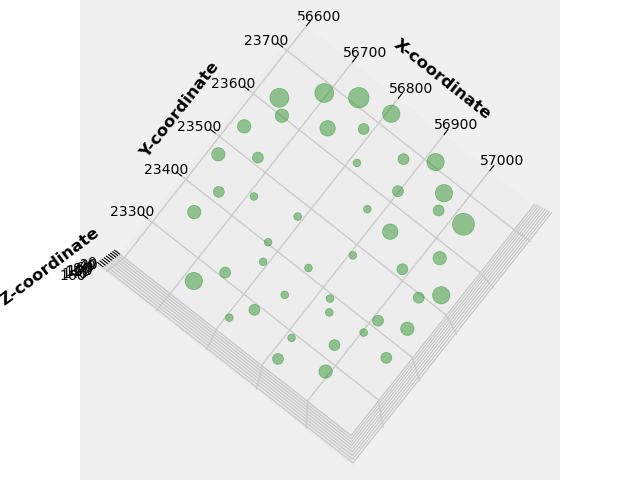

In [19]:
from matplotlib import pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure()
ax1 = Axes3D(fig1)

# xdata = div4.Adjusted_X #Here, the X-coordinate value of the first dividing cell was subtracted from that of the other cells.  
# ydata = div4.Adjusted_Y #Here, the Y-coordinate value of the first dividing cell was subtracted from that of the other cells.
# zdata = div4.Adjusted_Z #Here, the timing of the first cell division was subtracted from that of the other cells.

ax1.scatter(div1['Position X'], div1['Position Y'], div1['Position Z'], c='green', s=adj_time_1, cmap='inferno', alpha=0.4)

ax1.set_xlabel('X-coordinate', fontweight ='bold')
ax1.set_ylabel('Y-coordinate', fontweight ='bold')
ax1.set_zlabel('Z-coordinate', fontweight ='bold')

plt.savefig('3D plot ' + celldiv_round_div1 + '.pdf')
plt.show()

In [20]:
# Let's plot the data from div2.

min_Time_2 = min(div2.Time_seconds)
t2 = div2.loc[div2['Time_seconds'] == min_Time_2]
t2

,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number
47,56811.601562,23486.099609,97.441002,48,48,1496.64,47
48,56902.601562,23420.300781,82.500000,48,52,1496.64,48
49,56832.601562,23353.000000,120.739998,48,57,1496.64,49
50,56802.898438,23603.000000,100.178001,48,67,1496.64,50


<IPython.core.display.Javascript object>


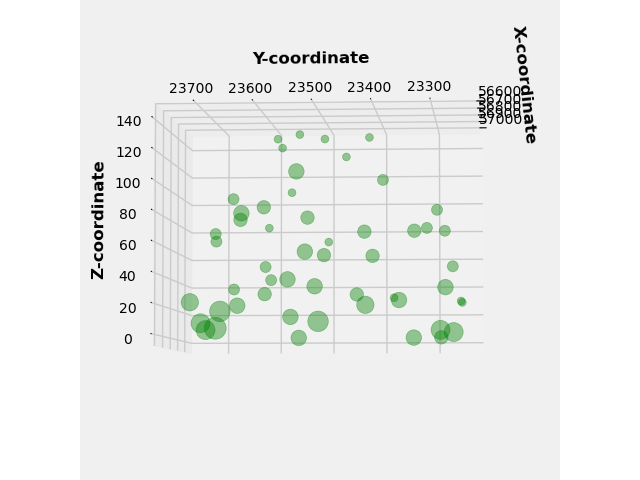

In [21]:
adj_time_2 = div2['Adjusted_Time'] = (div2.Time_seconds - min_Time_2) # New column with adjusted time.


fig2 = plt.figure()
ax2 = Axes3D(fig2)

# xdata = div4.Adjusted_X #Here, the X-coordinate value of the first dividing cell was subtracted from that of the other cells.  
# ydata = div4.Adjusted_Y #Here, the Y-coordinate value of the first dividing cell was subtracted from that of the other cells.
# zdata = div4.Adjusted_Z #Here, the timing of the first cell division was subtracted from that of the other cells.

ax2.scatter(div2['Position X'], div2['Position Y'], div2['Position Z'], c='green', s=adj_time_2, cmap='inferno', alpha=0.4)

ax2.set_xlabel('X-coordinate', fontweight ='bold')
ax2.set_ylabel('Y-coordinate', fontweight ='bold')
ax2.set_zlabel('Z-coordinate', fontweight ='bold')

plt.savefig('3D plot ' + celldiv_round_div2 + '.pdf')
plt.show()

In [22]:
# Let's plot the data from div3.

min_Time_3 = min(div3.Time_seconds)
t3 = div3.loc[div3['Time_seconds'] == min_Time_3]
t3

,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number
67,58772.101562,18597.300781,114.917000,92,121,2862.764,61
66,59058.101562,18722.099609,98.794998,92,114,2862.764,62
64,58988.398438,18768.300781,126.570999,92,76,2862.764,63
65,58729.199219,18647.199219,148.182999,92,80,2862.764,64
62,58773.199219,18722.000000,146.341003,92,72,2862.764,65
61,58833.101562,18657.199219,168.473999,92,67,2862.764,66
63,58825.601562,18783.900391,130.147003,92,73,2862.764,67


<IPython.core.display.Javascript object>


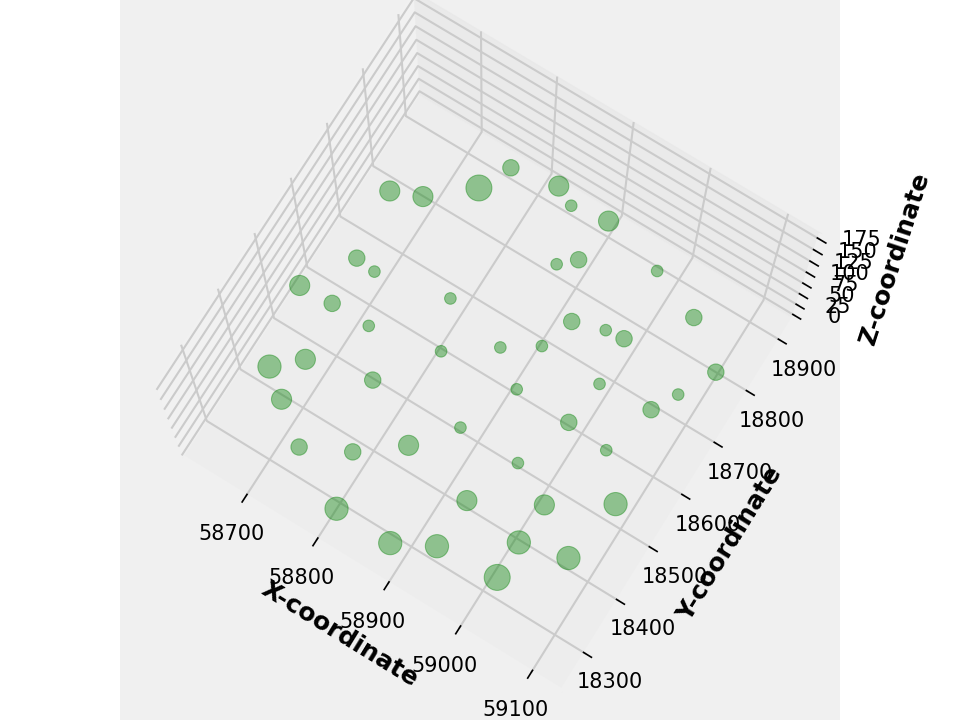

In [23]:
adj_time_3 = div3['Adjusted_Time'] = (div3.Time_seconds - min_Time_3) # New column with adjusted time.

fig3 = plt.figure()
ax3 = Axes3D(fig3)

# xdata = div4.Adjusted_X #Here, the X-coordinate value of the first dividing cell was subtracted from that of the other cells.  
# ydata = div4.Adjusted_Y #Here, the Y-coordinate value of the first dividing cell was subtracted from that of the other cells.
# zdata = div4.Adjusted_Z #Here, the timing of the first cell division was subtracted from that of the other cells.

ax3.scatter(div3['Position X'], div3['Position Y'], div3['Position Z'], c='green', s=adj_time_3, cmap='inferno', alpha=0.4)

ax3.set_xlabel('X-coordinate', fontweight ='bold')
ax3.set_ylabel('Y-coordinate', fontweight ='bold')
ax3.set_zlabel('Z-coordinate', fontweight ='bold')

plt.savefig('3D plot ' + celldiv_round_div3 + '.pdf')
plt.show()